In [14]:
from matplotlib import pyplot as plt
from openairclim.calc_ch4 import calc_swv_mass_conc
from openairclim.calc_swv import *

# delta_mass, delta_conc, swv_distribution= calc_swv_mass_conc([10,20,30,40,50])
# _, _, swv_distribution_a= calc_swv_mass_conc([1047,1047,1047,1047,1047])
# _, _, swv_distribution_b= calc_swv_mass_conc([614,614,614,614,614])
mass_c, _, _= calc_swv_mass_conc([212,212,212,212,212,212,212,212,212,212,])
print(mass_c)

strat_loss_min = 40 #Tg
strat_loss_max = 70 #Tg

# change of c from 1566.16 to 1778.01 ppbv

percent_change = (1778.01-1566.16)/1566.16

M_ch4 = 16.04
M_h20 = 18.015
conversion_factor = M_h20/M_ch4*2 # as 1 molecule ch4 causes 2 molecules h2o. conversion_factor = = 2.25


strat_loss_increase_min = 40*percent_change*conversion_factor
strat_loss_increase_max = 70*percent_change*conversion_factor
# lifetime of 4 years
tot_min = strat_loss_increase_min*4 # TODO the multiplication of 4 is a critical moment
tot_max = strat_loss_increase_max*4
print(tot_min, tot_max)
# 48 is close to 49 but the other not....


[ 0.          3.8546458  14.4035207  30.3180625  49.38457458 49.38457458
 49.38457458 49.38457458 49.38457458 49.38457458]
48.615216186432804 85.0766283262574


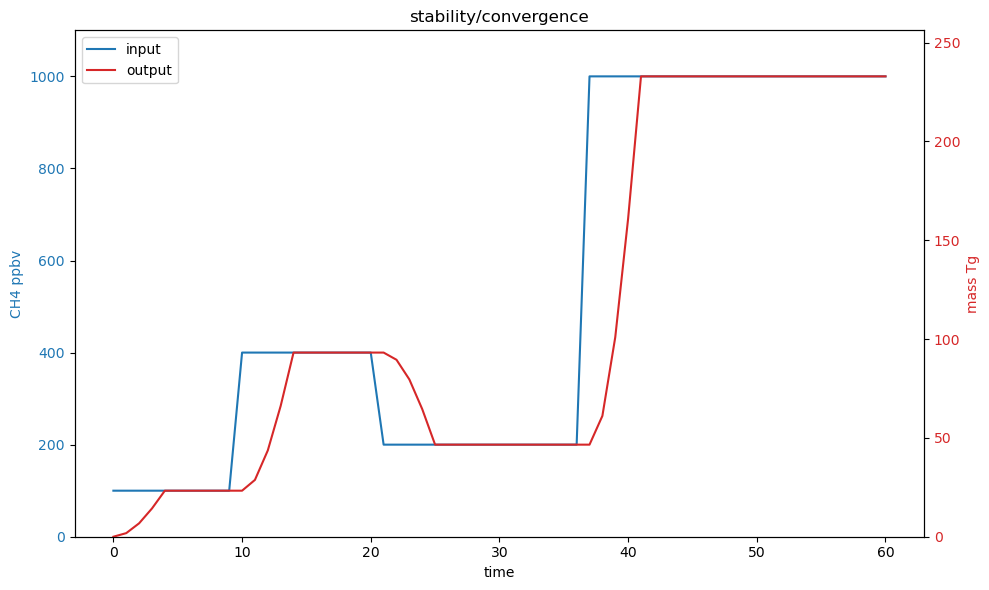

In [24]:
# Check of steady state
input = [100,100,100,100,100,100,100,100,100,100,400,400,400,400,400,400,400,400,400,400,400,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]
m, c, d = calc_swv_mass_conc(input)

import numpy as np
t = np.arange(0, len(input))

plt.figure(figsize=(10, 6))
line1, = plt.plot(t, input, color='tab:blue', label='input')
plt.ylim([0,1100])
plt.ylabel('CH4 ppbv', color='tab:blue')
plt.xlabel('time')
plt.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis
plt.twinx()  # This returns a second Axes instance implicitly used by plt

# Second plot (right y-axis)
line2, = plt.plot(t, m, color='tab:red', label='swv mass')
plt.ylim([0,max(m)*1.1])

plt.ylabel('mass Tg', color='tab:red')
plt.tick_params(axis='y', labelcolor='tab:red')

# Title
plt.title('stability/convergence')
plt.legend([line1, line2], ['input', 'output'])
plt.tight_layout()
plt.show()

# plt.plot(t, input)
# plt.plot(t, m)
# plt.show()
